# Molar Heat Capacity of Water Vapor
## Chem 113, Spring 2020, Liang Shi

In this exercise, we will compute the molar heat capacity of water vapor from spectroscopic data using statistical mechanics. Consider the water vapor as an ideal gas, and the partition function for water vapor is given by

$$ Q = \frac{q^N}{N!}, $$

where $q$ is the molecular partition function, which can be further approximately factorized as 

$$ q = q_e q_v q_r q_t, $$

where $q_e$, $q_v$, $q_r$, and $q_t$ are molecular electronic, vibrational, rotational, and translational partition functions.

### Molecular electronic partition function $q_e$

From Eq. (18.44) in M&S,

$$ q_e = g_{e1} e^{D_e / k_B T} + ..., $$

where $g_{e1}=1$ for water, and $D_e$ can be determined spectroscopically.

### Molecular translational partition function $q_t$

From Eq. (18.43) in M&S,

$$q_t = \left [ \frac{2\pi M k_B T}{h^2}\right]^{3/2}V,$$

where $M$ is the total mass of the molecule.

### Molecular rotational partition function $q_r$

From Eq. (18.56) in M&S, 

$$ q_r = \frac{\sqrt{\pi}}{\sigma} \left( \frac{T^3}{\Theta_{r,A} \Theta_{r,B} \Theta_{r,C}} \right)^{1/2},$$

where $\sigma=2$, $\Theta_{r,A}=40.1 K$, $\Theta_{r,B}=20.9 K$, and $\Theta_{r,C}=13.4 K$ for water since water molecule is an asymmetric top with a $C_{2V}$ symmetry. 

### Molecular vibrational partition function $q_v$

From Eq. (18.46) in M&S,

$$ q_v = \prod_{j=1}^3 \frac{e^{-\Theta_{v,j}/2T}}{1-e^{-\Theta_{v,j}/T}}, $$

where $\Theta_{v,1}=5360 K$, $\Theta_{v,2}=5160 K$, and $\Theta_{v,3}=2290 K$ for water.

**Question: how do we get the characteristic vibrational temperatures?**

### Total energy of water vapor

$$ \langle E \rangle = k_B T^2 \left ( \frac{\partial \ln Q}{\partial T} \right)_{NV} $$ 

$$ = N k_B T^2 \frac{\partial \ln q}{\partial T}  $$

$$ = N k_B T^2 \left ( \frac{\partial \ln q_e}{\partial T} + \frac{\partial \ln q_v}{\partial T} + \frac{\partial \ln q_r}{\partial T} + \frac{\partial \ln q_t}{\partial T} \right ) $$

$$ = n R T^2 \left ( \frac{\partial \ln q_e}{\partial T} + \frac{\partial \ln q_v}{\partial T} + \frac{\partial \ln q_r}{\partial T} + \frac{\partial \ln q_t}{\partial T} \right ) $$

The last step uses $N=n N_A$ and $k_B = R/N_A$.

### Molar energy of water vapor

$$ \langle \bar{E} \rangle = \frac{\langle E \rangle}{n} $$

$$ = R T^2 \left ( \frac{\partial \ln q_e}{\partial T} + \frac{\partial \ln q_v}{\partial T} + \frac{\partial \ln q_r}{\partial T} + \frac{\partial \ln q_t}{\partial T} \right ) $$

### Molar heat capacity of water vapor

$$ \bar{C}_V = \left ( \frac{\partial \langle \bar{E} \rangle}{\partial T} \right )_{NV} $$

$$ = 0 + R\sum_{j=1}^{3} \left( \frac{\Theta_{v,j}}{T}\right)^2 \frac{e^{-\Theta_{v,j}/T}}{(1-e^{-\Theta_{v,j}/T})^2} + \frac{3}{2} R + \frac{3}{2} R$$

$$ \frac{\bar{C}_V}{R} =  3 + \sum_{j=1}^{3} \left( \frac{\Theta_{v,j}}{T}\right)^2 \frac{e^{-\Theta_{v,j}/T}}{(1-e^{-\Theta_{v,j}/T})^2}$$

**Question: do you know how to get the equation above?**

**Let's start calculating $\bar{C}_V/R$ for water**

In [1]:
# load some libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Set the parameters first:

In [2]:
# Parameters
T = 300.0        # K
theta1 = 5360.0  # K
theta2 = 5160.0  # K
theta3 = 2290.0  # K

Now we define a function that computes the term in the summation:

In [3]:
def vib_cv(T, theta):
    import math
    ratio = theta / T
    return math.pow(ratio,2) * math.exp(-ratio) / math.pow(1.0-math.exp(-ratio),2)

Now we can compute $\bar{C}_V/R$:

In [4]:
cv = 3.0 + vib_cv(T,theta1) + vib_cv(T,theta2) + vib_cv(T,theta3)
print(cv) 

3.0282471146959566


The experimental value of $\bar{C}_V/R$ at 300 K is 3.011. 

If we use numpy, we can further simplify the code:

In [5]:
def vib2_cv(T, theta): # theta here is an array
    import numpy as np
    ratio = theta / T
    return np.power(ratio,2) * np.exp(-ratio) / np.power(1.0-np.exp(-ratio),2)

In [6]:
theta = np.array([theta1, theta2, theta3])
cv = 3.0 + np.sum(vib2_cv(T,theta))
print(cv)

3.0282471146959566


---

### Group Exercise 1

In class, we learned that the high temperature limit of $\bar{C}_{V,vib}$ is $R$ for a single vibration (see Figure 18.3 in M&S). Since water molecule has 3 vibrations, what do you think is the high temperature limit of $\bar{C}_V / R$ for water vapor? Verify your answer by computing $\bar{C}_V / R$ at a higher temperature. How high does the temperature have to be to approach the high temperature limit for water vapor?

---

In [7]:
T=1.0*theta1
cv = 3.0 + np.sum(vib2_cv(T,theta))
print(cv)

5.831821143129288


** Now let's examine $\bar{C}_V/R$ as a function of $T$. **

Since we are going to repeatedly calculate $\bar{C}_V/R$ for different temperatures, it is convinent to define a function to do so:

In [8]:
def cv(T, theta): 
    import numpy as np
    ratio = theta / T
    return 3.0 + np.sum(np.power(ratio,2) * np.exp(-ratio) / np.power(1.0-np.exp(-ratio),2))

---

### Group Exercise 2

Now you need to use the function `cv` defined above to make a plot similar to Figure 18.7 in M&S (note that the y-axis label of that figure should be $\bar{C}_V/R$). You might need to use `for` loop in Python, and part of the code is provided.


In [13]:
# use a for loop
temperature = np.arange(300.0,1300.0,200.0) # generate the temperature array
nt = np.shape(temperature)[0] # get the number of elements in the array
cv_theo = np.zeros(nt) # create an array with zeros
for i in range(nt): # Iterate over all the temperatures
    T=temperature[i]
    cv_theo[i]=cv(T,theta)
    
print(cv_theo)

[3.02824711 3.22564244 3.50081093 3.79811328 4.09566246]


Load experimental data extracted from Figure 18.7 in M&S.

In [14]:
# Load the experimental data 
exp = np.loadtxt('cv_exp.txt') # the exp data file has 2 columns
T_exp = exp[:,0] # the 1st column is the temperature in K
cv_exp = exp[:,1] # the 2nd column is Cv from exp.

Plot the results and compare them

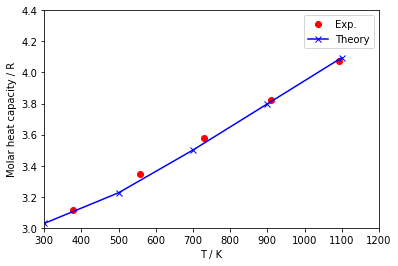

In [16]:
plt.plot(T_exp, cv_exp, 'ro', label="Exp.")
plt.plot(temperature, cv_theo, 'b-x', label="Theory") ### You need to edit this line
plt.xlabel('T / K')
plt.ylabel('Molar heat capacity / R')
plt.xlim((300,1200))
plt.ylim((3.0,4.4))
plt.legend()
plt.show()